In [59]:
import pickle
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd

In [60]:
with open('./data/test.pkl', 'rb') as f:
    test_data = pickle.load(f)

In [61]:
test_data=np.array(test_data)
test_x=test_data[:,0]
test_y=test_data[:,1]


In [62]:
with open('./data/train.pkl', 'rb') as f2:
    train_data = pickle.load(f2)

In [63]:
train_data = np.array(train_data)
np.random.shuffle(train_data)
train_x=train_data[:,0]
train_y=train_data[:,1]
train_x=np.array(np.array_split(train_x,10))
train_y=np.array(np.array_split(train_y,10))
bias=[]
vari=[]
err=[]
ierr=[]

In [64]:
# outputs
output=[]
#loop through degrees
for degree in range(1,21):
    # loop through models
    output.append([])
    for i in range(10):
        x_train = PolynomialFeatures(degree=degree).fit_transform(train_x[i].reshape(-1,1))
        x_test = PolynomialFeatures(degree=degree).fit_transform(test_x.reshape(-1,1))
        curr_model = LinearRegression().fit(x_train,train_y[i])
        output[degree-1].append(curr_model.predict(x_test))

In [65]:
def bias_var():
    global bias
    global vari
    global err
    bias=[]
    vari=[]
    err=[]
    ierr=[]
    for degree in range(1,21):
        output_curr_degree= output[degree-1]
        output_curr_degree=np.array(output_curr_degree)
        mean_point_over_10 = np.mean(output_curr_degree, axis = 0)
        bias.append(np.mean((mean_point_over_10 - test_y)))
        var_point_over_10 = np.var(output_curr_degree, axis = 0)
        vari.append(np.mean(var_point_over_10))
        err_a= np.array(output_curr_degree)-np.array(test_y)
        err_a=np.square(err_a)
        err_mean = np.mean(err_a, axis=0)
        err.append(np.mean(err_mean))
        ierr.append(err[degree-1] - (bias[degree-1]**2) - vari[degree-1])
        
    table = pd.DataFrame({"Degree":np.array(range(1,21)),"Bias": bias,"Bias Square": np.array(bias)**2 ,"Variance": vari, "Mean Squared Error": err, "Irreducible Error": ierr})
    print(table.to_string(index=False))
    return table
        
    
    
    

In [66]:
table = bias_var()

 Degree        Bias   Bias Square       Variance  Mean Squared Error  Irreducible Error
      1  230.721061  53232.208092   35317.339415        1.038054e+06      949504.523620
      2  226.695944  51391.051087   70052.164260        1.024300e+06      902856.800084
      3  -13.255548    175.709563   73068.151528        8.222495e+04        8981.085621
      4   -5.360691     28.737009   91272.706194        9.995672e+04        8655.280650
      5   -3.573963     12.773212  108899.448529        1.173794e+05        8467.153045
      6   -5.466334     29.880807  119637.081796        1.285115e+05        8844.555520
      7   -4.029193     16.234399  146398.853171        1.559825e+05        9567.402475
      8   -8.336483     69.496954  166308.714700        1.757214e+05        9343.218992
      9   -6.394326     40.887408  195277.997910        2.049772e+05        9658.344881
     10   -8.990033     80.820686  206639.666052        2.177316e+05       11011.118980
     11  -13.818541    190.95207

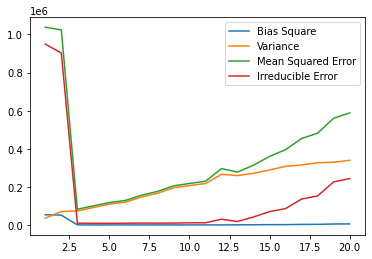

In [67]:
import matplotlib.pyplot as plt
plt.plot(np.array(range(1,21)),table["Bias Square"].tolist(),label="Bias Square")
plt.plot(np.array(range(1,21)),table["Variance"].tolist(),label="Variance")
plt.plot(np.array(range(1,21)),table["Mean Squared Error"].tolist(), label="Mean Squared Error")
plt.plot(np.array(range(1,21)),table["Irreducible Error"].tolist(), label="Irreducible Error")
plt.legend()
plt.show()